# Análise da Carteira

In [65]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Brasileiro Atual

### Pegando os dados na API do Yahoo

In [66]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA',
           'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
flry = web.DataReader(tickers[3], ds_yahoo, start, end)
pssa = web.DataReader(tickers[4], ds_yahoo, start, end)
tiet = web.DataReader(tickers[5], ds_yahoo, start, end)
leve = web.DataReader(tickers[6], ds_yahoo, start, end)
whrl = web.DataReader(tickers[7], ds_yahoo, start, end)

In [109]:
itau.tail(10)

,High,Low,Open,Close,Volume,Adj Close,Retorno Normalizado,Alocacao,Posicao
Date,,,,,,,,,
2019-11-07,36.950001,36.570000,36.779999,36.820000,15689500.0,36.820000,1.099008,1.267156,12671.563465
2019-11-08,36.779999,36.020000,36.360001,36.270000,15088000.0,36.270000,1.082592,1.248228,12482.281817
2019-11-11,36.799999,35.900002,36.200001,36.430000,17480000.0,36.430000,1.087367,1.253735,12537.345593
2019-11-12,36.290001,35.430000,36.020000,35.810001,19644000.0,35.810001,1.068862,1.232397,12323.973624
2019-11-13,35.840000,35.180000,35.669998,35.450001,17688000.0,35.450001,1.058116,1.220008,12200.079800
2019-11-14,35.790001,35.160000,35.500000,35.680000,14012300.0,35.680000,1.064981,1.227923,12279.233896
2019-11-18,36.200001,35.480000,36.000000,35.520000,13345400.0,35.520000,1.060206,1.222417,12224.170120
2019-11-19,35.599998,34.849998,35.500000,35.130001,17887600.0,35.130001,1.048565,1.208995,12089.952248
2019-11-21,35.500000,35.029999,35.130001,35.490002,26063800.0,35.490002,1.059310,1.221385,12213.846072


## Normalizando o retorno diário de cada ativo do portfólio

In [67]:
for acao_df in (itau, abev, usim, flry, pssa, tiet, leve, whrl):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [147]:
pesos = [1.153, .931, 1.864, .723, .820, 1.30, 2.289, .92]

for acao_df, alocacao in zip((itau, abev, usim, flry, pssa, tiet, leve, whrl), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [148]:
for acao_df in (itau, abev, usim, flry, pssa, tiet, leve, whrl):
    acao_df['Posicao'] = acao_df['Alocacao'] * 1000

In [149]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'], flry['Posicao'],
                  pssa['Posicao'], tiet['Posicao'], leve['Posicao'], whrl['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [150]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']
portfolio_acoes.columns = portfolio_posicao.columns

## Desempenho da carteira

In [151]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [152]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
10000.0
Investimento final:
11648.37


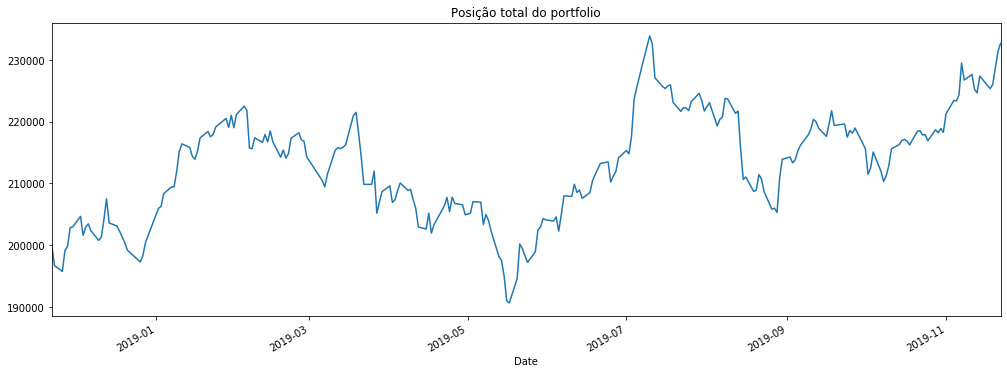

In [127]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

## Desempenho da Carteira Normalizada

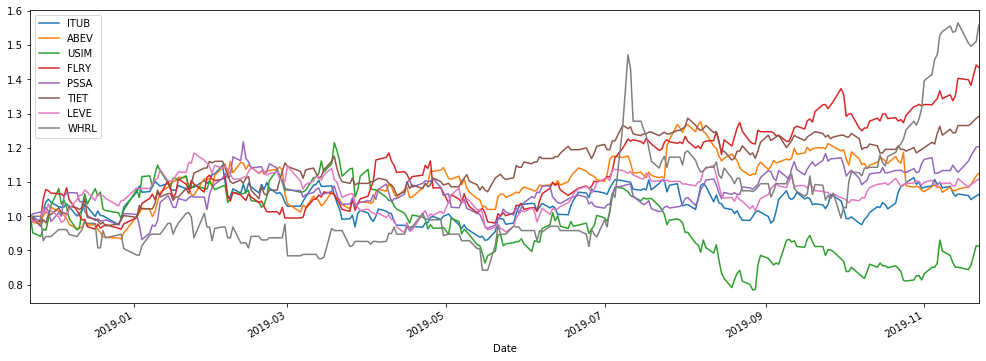

In [128]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [129]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

### Rendimento médio diário

In [130]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.07% diariamente


### Desvio Padrão

In [131]:
# Desvio Padrão do retorno diário
std = round(portfolio_posicao['Retorno Diario'].std(), 5)
print('Essa carteira tem um Desvio Padrão de {}'.format(std))

Essa carteira tem um Desvio Padrão de 0.01024


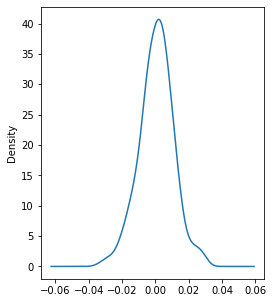

In [132]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

In [133]:
print('Foram analisados {} pregões dos quais:'.format(len(portfolio_posicao)))
print('{} dias foram de queda.'
      .format(len(portfolio_posicao[portfolio_posicao['Retorno Diario'] > 0])))
print('{} dias foram de de alta.'
      .format(len(portfolio_posicao[portfolio_posicao['Retorno Diario'] < 0])))

Foram analisados 249 pregões dos quais:
137 dias foram de queda.
111 dias foram de de alta.


## Retorno Total da Carteira

In [134]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {}%'.format(round_ret))

Essa carteira rendeu 16.448%
